# MNIST For ML Beginners
- using Convolutional Neural Network

### MNIST data 가져오기

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [2]:
import tensorflow as tf

In [3]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [4]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [5]:
y = tf.matmul(x,W) + b

In [6]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

In [7]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [8]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [9]:
for _ in range(1000):
    batch = mnist.train.next_batch(100)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})

In [10]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [11]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [12]:
print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9187


In [13]:
sess.close()

### weight_variable function define

In [14]:
def weight_variable(shape):
    # 표준편차 0.1로 설정하여 랜덤으로 초기화
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    # 값 0.1로 설정하여 초기화
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

### Convolution Layer, Pooling Layer Function define

In [15]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

### Model Design

- input tensor define : shape[None, 28, 28, 1]
- None : 학습 샘플 갯수 미정
- 28, 28 : 28*28 크기 이미지
- 1 : channal 개수, MNIST는 흑백 손글씨 이므로 channal이 1

In [16]:
x_image = tf.reshape(x, [-1,28,28,1])

- 1st Convolution Layer define : shape[5, 5, 1, 32]
- 5, 5 : 5*5 크기의 필터(filter), 커널(kernal)
- 1 : Input image channal
- 32 : 특징맵(feature map) 개수

In [17]:
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

In [18]:
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

- 2st Convolutional Layer define : shape[5, 5, 32, 64]
- 5,5 : 5*5 크기의 필터(filter), 커널(kernal)
- 32 : 이전 layer의 특징맵 개수
- 64 : 특징맵(feature map) 개수

In [19]:
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

# 활성함수 relu 사용
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [20]:
W_fc1 = weight_variable([7 * 7 * 64, 1024]) 
b_fc1 = bias_variable([1024])

# 28 - 14 - 7에 마지막 특징 맵 개수 64
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

- 드롭아웃 (dropout) 개수 설정

In [21]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

- Fully connected layer 설정

In [22]:
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

- 최종 출력단 활성 함수로 소프트맥스를 사용
- Classification 문제이므로 크로스 엔트로피 오차 함수 사용

In [23]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

for i in range(5000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.06
step 100, training accuracy 0.9
step 200, training accuracy 0.88
step 300, training accuracy 0.92
step 400, training accuracy 0.9
step 500, training accuracy 0.86
step 600, training accuracy 0.96
step 700, training accuracy 0.92
step 800, training accuracy 1
step 900, training accuracy 0.94
step 1000, training accuracy 0.94
step 1100, training accuracy 0.96
step 1200, training accuracy 0.98
step 1300, training accuracy 0.96
step 1400, training accuracy 0.96
step 1500, training accuracy 0.96
step 1600, training accuracy 0.98
step 1700, training accuracy 1
step 1800, training accuracy 0.98
step 1900, training accuracy 1
step 2000, training accuracy 0.98
step 2100, training accuracy 1
step 2200, training accuracy 0.94
step 2300, training accuracy 0.98
step 2400, training accuracy 0.96
step 2500, training accuracy 1
step 2600, training accuracy 1
step 2700, training accuracy 0.94
step 2800, training accuracy 1
step 2900, training accuracy 1
step 3000, trainin

### Prediction
- 256번째 MNIST 이미지 내용

In [24]:
mnist.test.images[256]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

- 256번째 MNIST 이미지 내용 시각화

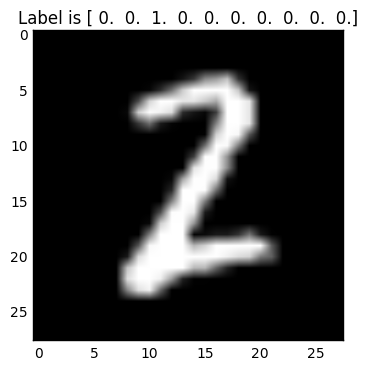

In [25]:
import numpy as np
import matplotlib.pyplot as plt

label = mnist.test.labels[256]

# The rest of columns are pixels
pixels = mnist.test.images[256]

# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((28, 28))

# Plot
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixels, cmap='gray')
plt.show()

- Model Prediction

In [26]:
prediction = tf.argmax(y_conv, 1)
print (prediction.eval(feed_dict={x: mnist.test.images[256:257], keep_prob: 1.0}))

[2]


In [27]:
sess.close()